# Machine Learning Capstone Project
## By Cyril Michino Chege | [Github](https://github.com/cyrilmichino)
### Official Project Description

This dataset is composed of 1300 samples with 30 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 3 possible values for the labels. The remaining columns are numeric
features.

Your task is the following: you should compare the performance of a Support-
Vector Machine (implemented by sklearn.svm.LinearSVC) with that of Logistic
Regression (implemented by sklearn.linear_model.LogisticRegression). Try to
optimize both algorithms' parameters and determine which one is best for this
dataset. At the end of the analysis, you should have chosen an algorithm and its
optimal set of parameters: write this choice explicitly in the conclusions of
your notebook.

Your notebook should detail the procedure you have used to choose the optimal
parameters (graphs are a good idea when possible/sensible).

The notebook will be evaluated not only based on the final results, but also on
the procedure employed, which should balance practical considerations (one may
not be able to exhaustively explore all possible combinations of the parameters)
with the desire for achieving the best possible performance in the least amount
of time.

Bonus points may be assigned for particularly clean/nifty code and/or well-presented results.

You are also free to attempt other strategies beyond the one in the assignment
(which however is mandatory!).

In [2]:
#General Operations Libraries
import pickle
import random
import warnings
import itertools

#Data Analysis Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
#from sklearn.neighbors import KNeighborsClassifier, NearestCentroid, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix #In strings: 'accuracy', 'f1', 'roc_auc'

warnings.filterwarnings(action="ignore")
%matplotlib inline

## Basic Data Analysis

In [4]:
#Import and visualise data columns
data = pd.read_csv("data.csv", index_col=0)
data.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,1,-0.175191,0.299030,-0.768587,-5.384094,1.379607,6.886095,-2.223513,2.469312,2.115212,...,0.600137,3.442208,-0.187299,4.658696,0.800293,3.542705,-1.799686,1.905721,4.658696,-0.722506
1,0,1.051032,0.445523,0.289817,-2.734519,0.083652,2.993606,1.000140,-0.754929,-1.549806,...,1.311651,-1.519870,1.219607,-2.688456,0.975750,2.872060,-1.535260,0.064677,-2.688456,0.184203
2,1,2.803331,-1.521435,-0.100668,1.326577,0.273422,1.984409,1.320005,-0.869559,0.383327,...,0.136577,-0.358939,2.457758,0.697211,-0.622162,3.679804,-1.809725,0.156737,0.697211,-1.897684
3,2,2.689503,-4.120008,-0.766513,-3.445241,0.771095,-0.628063,1.798364,2.100721,-0.749829,...,1.620021,1.461153,-3.721542,-4.701268,0.550195,-1.385252,-2.801007,-1.000042,-4.701268,-1.171352
4,0,-2.330357,2.846977,-1.240633,0.494695,0.204640,4.405562,-2.095133,-2.798952,-0.894024,...,0.030749,1.522194,0.379030,-0.763488,-0.133195,-0.755366,0.977210,2.800476,-0.763488,0.462964


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       1300 non-null   int64  
 1   feature_1   1300 non-null   float64
 2   feature_2   1300 non-null   float64
 3   feature_3   1300 non-null   float64
 4   feature_4   1300 non-null   float64
 5   feature_5   1300 non-null   float64
 6   feature_6   1300 non-null   float64
 7   feature_7   1300 non-null   float64
 8   feature_8   1300 non-null   float64
 9   feature_9   1300 non-null   float64
 10  feature_10  1300 non-null   float64
 11  feature_11  1300 non-null   float64
 12  feature_12  1300 non-null   float64
 13  feature_13  1300 non-null   float64
 14  feature_14  1300 non-null   float64
 15  feature_15  1300 non-null   float64
 16  feature_16  1300 non-null   float64
 17  feature_17  1300 non-null   float64
 18  feature_18  1300 non-null   float64
 19  feature_19  1300 non-null  

In [6]:
data.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,1.004615,0.538441,0.564395,0.111548,0.562520,0.118493,0.011493,0.685878,-0.665518,0.102386,...,0.099308,-0.053699,0.278267,0.610309,0.100524,-0.168736,0.230796,-0.084270,0.610309,0.137664
std,0.816484,2.730933,2.581858,1.024461,2.841056,1.006478,2.691406,2.518733,2.550913,0.982101,...,0.988319,2.805581,2.680886,2.567479,1.039176,2.909776,2.601933,2.785952,2.567479,1.001677
min,0.000000,-8.805293,-7.058771,-2.981594,-9.791274,-3.127923,-8.706809,-7.070077,-9.049962,-2.911090,...,-2.875839,-10.390801,-8.155762,-9.411871,-3.090801,-12.026419,-7.851654,-9.155803,-9.411871,-3.446479
25%,0.000000,-1.295377,-1.295175,-0.569006,-1.318707,-0.553303,-1.872059,-0.948267,-2.411363,-0.588623,...,-0.553294,-1.767644,-1.515978,-1.027513,-0.606794,-2.094732,-1.459985,-2.002902,-1.027513,-0.525204
50%,1.000000,0.492913,0.598401,0.116058,0.618974,0.108436,0.131648,0.682126,-0.705892,0.131977,...,0.071335,-0.031281,0.297612,0.631999,0.125241,-0.255620,0.240823,-0.025659,0.631999,0.132356
75%,2.000000,2.318563,2.319545,0.795945,2.515789,0.791900,2.003032,2.314486,1.018762,0.773806,...,0.743727,1.692704,2.141628,2.322417,0.795169,1.710145,2.029344,1.811207,2.322417,0.782378
max,2.000000,9.892331,9.027414,3.482049,10.659040,3.686682,8.958129,8.821828,8.944690,3.217624,...,3.312112,10.386582,8.623338,10.160013,3.694073,8.508229,9.562033,10.102895,10.160013,3.200063


In [7]:
print(data.dtypes)

label           int64
feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
feature_7     float64
feature_8     float64
feature_9     float64
feature_10    float64
feature_11    float64
feature_12    float64
feature_13    float64
feature_14    float64
feature_15    float64
feature_16    float64
feature_17    float64
feature_18    float64
feature_19    float64
feature_20    float64
feature_21    float64
feature_22    float64
feature_23    float64
feature_24    float64
feature_25    float64
feature_26    float64
feature_27    float64
feature_28    float64
feature_29    float64
feature_30    float64
dtype: object


### Insights from Basic Data Analysis:
1. No missing values
2. All features are continuous variables
3. Label is a discrete variable (classification problem)

## Exploratory Data Analysis

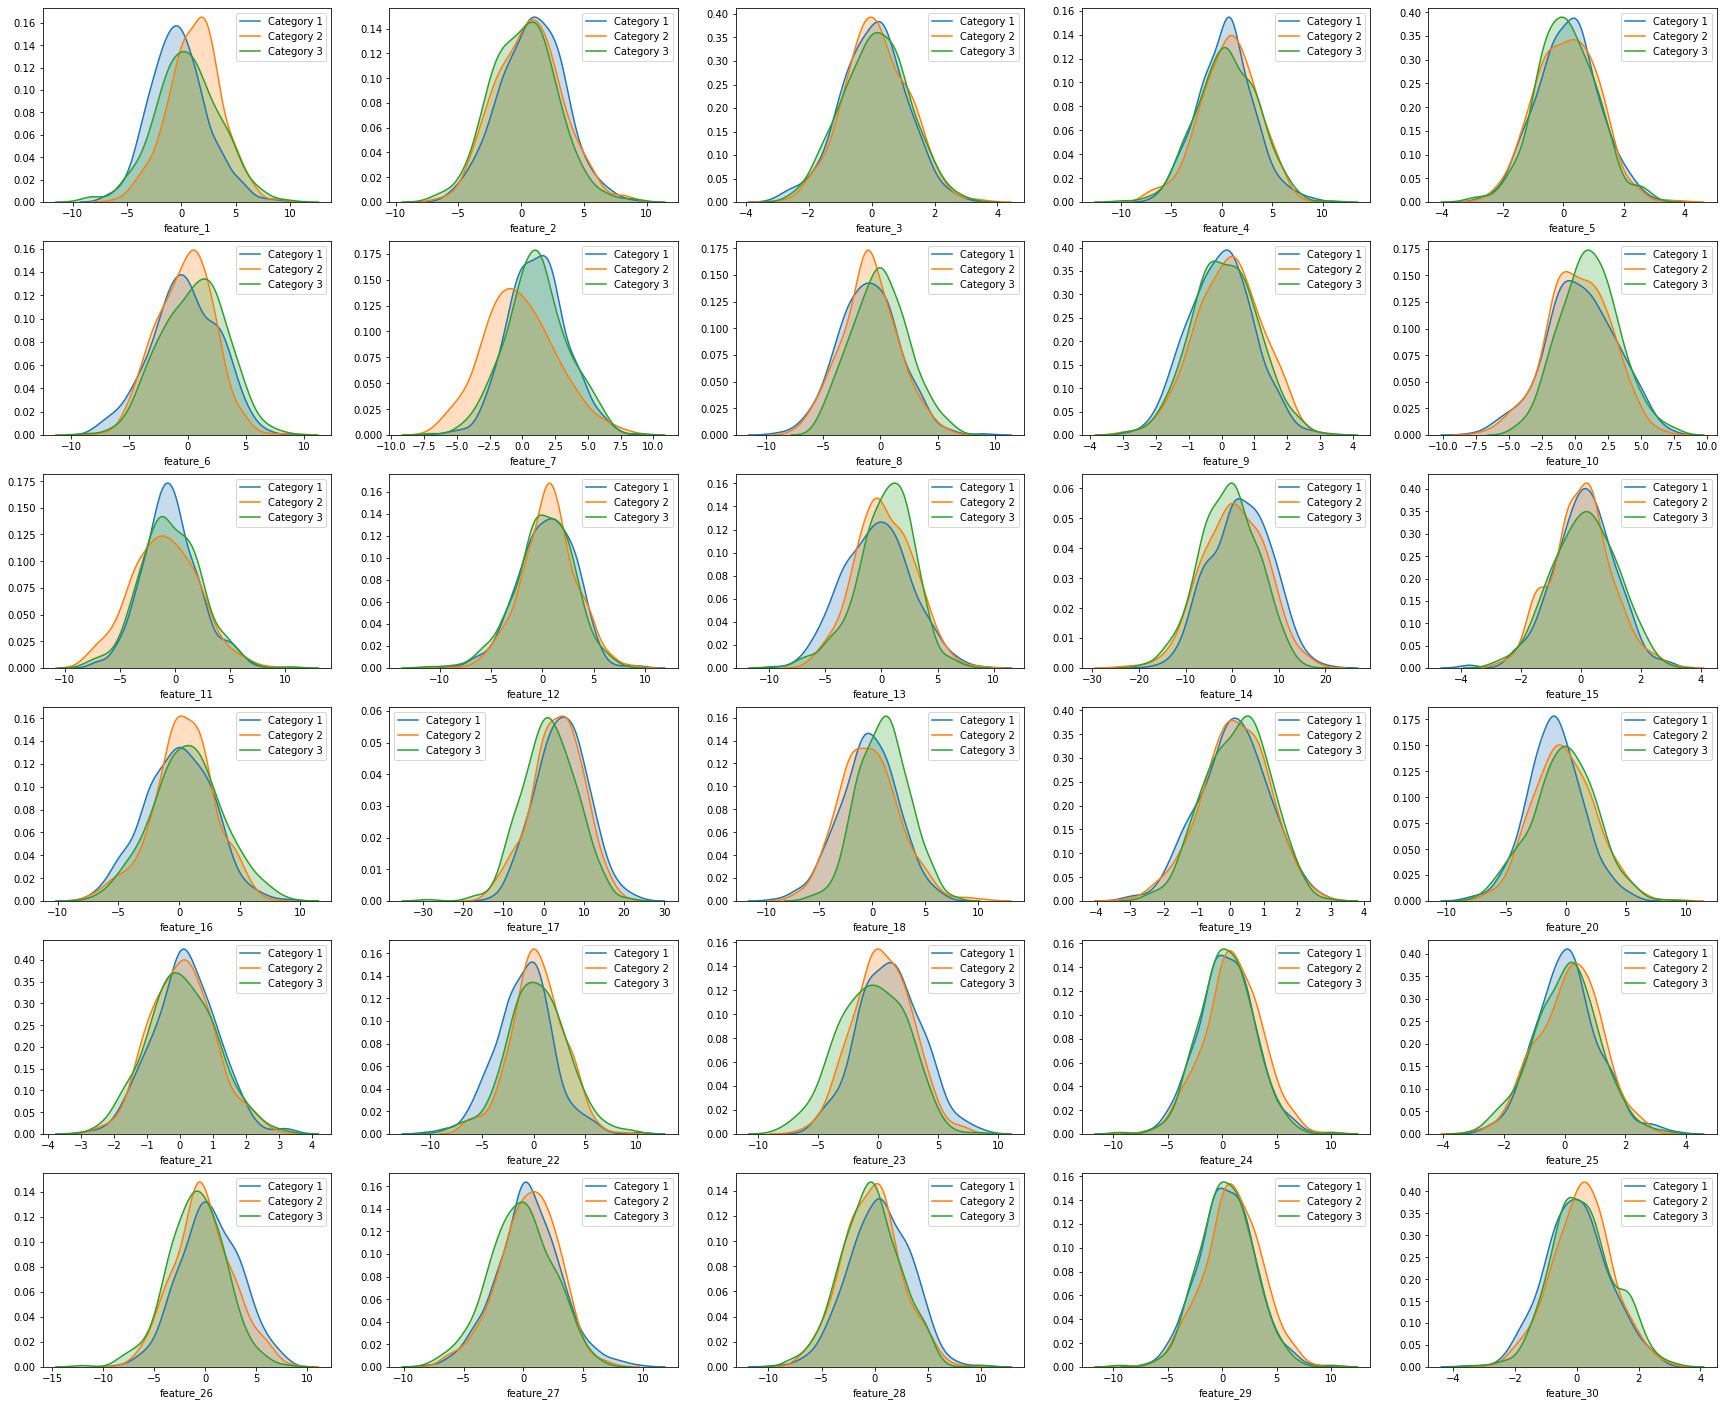

In [8]:
#Univariate Data Analysis (Kernel Density Estimate)
fig = plt.figure(figsize=(30,25))
for i in range(1,len(data.columns)):
    ax = fig.add_subplot(6,5, i)
    sns.kdeplot(data[data.columns[i]][data.label==0], label='Category 1', shade=True)
    sns.kdeplot(data[data.columns[i]][data.label==1], label='Category 2', shade=True)
    sns.kdeplot(data[data.columns[i]][data.label==2], label='Category 3', shade=True)
    plt.xlabel("feature_" + str(i))


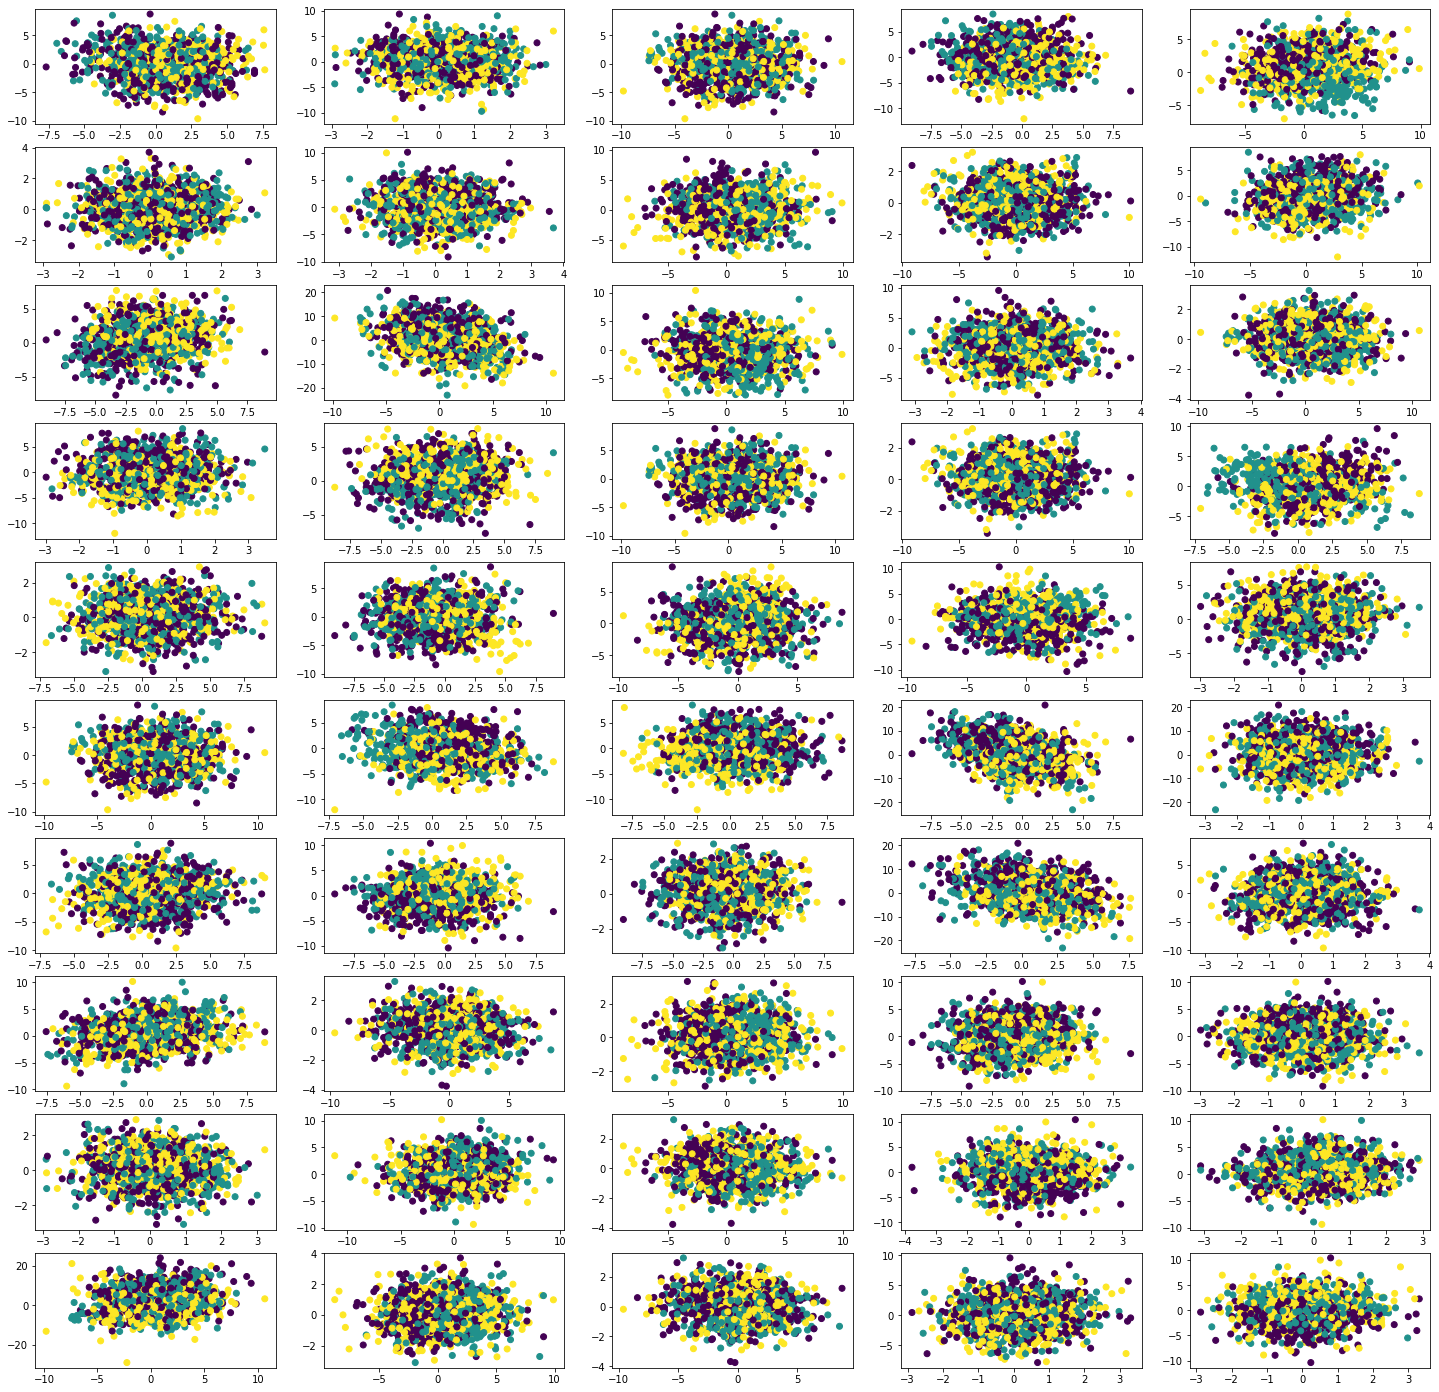

In [9]:
#Bivariate Data Analysis (Scatter Plots)
comb = list(itertools.combinations([a for a in range(1, len(data.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=50) #Randomly choose 50 bivariate relationships to visualise. Total bivariate relationships (465 = 30C2) is too much

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(data[data.columns[rand[i][0]]],data[data.columns[rand[i][1]]],c=data.label)


### Insights from Exploratory Data Analysis:
1. Most data features are not linearly separable for the classification problem as seen from bivariate scatter plots and the univariate KDE plot
2. **Inituition:** Support Vector Machines and Ensemble Methods would probably be the models for this data as they can work non-linear separations

## Classification Modeling
### Data Preparation

In [10]:
y = data["label"] #Target variable
X = data.drop(["label"], axis=1) #Independent variable
print(X.shape, y.shape)

(1300, 30) (1300,)


In [11]:
#Standardize the data
##Essential for any distance-based algorithms to be implemented (KNN)
###Normalisation ignoired due to presence of outliers across certain features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(1300, 30)


In [12]:
#Train Test Split: Reserve 10% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.10, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1170, 30) (130, 30) (1170,) (130,)


### Basic Modeling with Cross-validation
In this section, we try out different classification algorithms to understand how they perform with the available data. Paramaters are manually inputed and tried to tried to optimise performance of the algorithm. In the next section, we'll then work on hyperparameter tuning on the top performing algorithms.

#### Logistic Regression

In [13]:
#Logistic Regression (No Regularisation)
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(penalty='none', solver='lbfgs'))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.72033898 0.74576271 0.77118644 0.76068376 0.7008547  0.72649573
 0.70940171 0.68965517 0.78448276 0.81034483] 0.7419206791649808


In [14]:
#Logistic Regression (L1 Regularisation - Lasso)
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(penalty='l1', C=1))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.72881356 0.74576271 0.80508475 0.76923077 0.72649573 0.71794872
 0.78632479 0.72413793 0.84482759 0.81034483] 0.765897136177674


In [15]:
#Logistic Regression (L2 Regularisation - Ridge)
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(penalty='l2', C=1))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.71186441 0.74576271 0.79661017 0.76923077 0.7008547  0.74358974
 0.70940171 0.70689655 0.78448276 0.80172414] 0.7470417659488379


In [16]:
#Logistic Regression (L1 + L1 Combined Regularisation - ElasticNet)
pipe = make_pipeline(PolynomialFeatures(degree=3), LogisticRegression(penalty='elasticnet', solver='saga', C=1, l1_ratio=0.5))
scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.80508475 0.76271186 0.81355932 0.69230769 0.72649573 0.75213675
 0.76923077 0.82758621 0.79310345 0.75862069] 0.7700837217201916


##### Understanding the Results - Logistic Regression and its Variants
From the manual parameter tuning for the Logistic Regression and its variants above, we get the following results when we transform the data into different polynomial degrees from 1 to 4. Above degree 5, computation becomes too costly and it is hard for the algorithm to converge onto the ideal regression weights. View below:
| Model | 1st Degree | 2nd Degree | 3rd Degree | 4th Degree |
|---|---|---|---|---|
| Logistic Regression | 0.5818946784756253 | 0.7419206791649808 | 0.7657435297996373 | 0.7666499323132872 |
| L1 Regularisation | 0.5818946784756253 | **0.765897136177674** | 0.7556695739483582 | N/A |
| L2 Regularisation | 0.5818946784756253 | 0.7470417659488379 | 0.7641440253363105 | N/C |
| L1 + L2 Regularisation | 0.5818946784756253 | **0.77608823250261** | 0.7675268623836713 | N/A |

**Legend** – ***N/A***, Not Applicable as accuracy score has already peaked; ***N/C***, No Convergence as the computation involved was too intensive.

From the table of results, it is impossible to linearly separate the classes without the application of a polynomial function. For all results in degree 1, the accuracy score is below 60%. This figure increases rapidly as data is transformed by a polynomial kernel of degree 2 or 3. In both cases, the accuracy score is above 70%. Moreover, regularised logistic regression performs better than logistic regression without a penalty; with L1 Regularisation outputing a higher accuracy score than L2 Regularisation. However, hybrid regularisation of L1 and L2 Regularisation outputs the highest accuracy score, suggest that the optimal model should include both L1 and L2 penalties. We'll run a GridSearch Cross-validation to find both the optimal l1-to-l2 ration and the regularisation parameter, C.

**Note:** Logistic Regression gets computationally intensive as we increase the polynomial degree in our transformation. Therefore, if the optimal parameterss requires a polynomial degree higher than 3, we'd rather settle for an algorithm that incorporates the kernel trick (computationals needs do not increase exponentially as the degree of transformation increases) with a proximal accuracy score – Support Vector Machines.

**Additional Note:** the regularisation parameter used (C) – for models that require the parameter – is a random estimate of that optimises the accuracy score. In the next section, we'll further optimise this parameter using GridSearchCV or RandomSearchCV. In the case of ElasticNet (L1 + L2 Regularisation), the l1 to l2 ration will also be tuned in the next section.


#### Support Vector Classification

In [10]:
#Linear Support Vector Classification
scores = cross_val_score(LinearSVC(C=1), X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.63559322 0.61864407 0.6440678  0.52136752 0.57264957 0.57264957
 0.60683761 0.56896552 0.60344828 0.54310345] 0.5887326599629346


In [21]:
#Support Vector Classification (Polynomial Kernel)
scores = cross_val_score(SVC(kernel='poly', degree=3, C=1), X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.62711864 0.62711864 0.6440678  0.5042735  0.57264957 0.55555556
 0.64102564 0.5862069  0.6637931  0.47413793] 0.589594728928452


In [38]:
#Support Vector Classification (RBF Kernel)
scores = cross_val_score(SVC(kernel='rbf', C=25), X_train, y_train, cv=10, scoring="accuracy")
print(scores, scores.mean())

[0.80508475 0.77118644 0.8220339  0.76923077 0.77777778 0.79487179
 0.8034188  0.80172414 0.86206897 0.84482759] 0.8052224919700081


##### Understanding the results – Support Vector Classification
From the results above, **Linear Support Vector Classfication performs the worst**. The results are rather similar to Logistic Regression with no polynomial transformation. This further reinforces the idea that the classes are not linearly separable, an attribute observed first in the Exploratory Data Analysis section.

To make the model perform better, we have to use a kernel method to transform the data in order to find better accuracy score. Thus, we apply Polynomial and RBF kernel optimisation. Support Vectors Machines are more ideal for kernel transformations as the algroithm utilises the kernel trick; thus, computations do not increase exponentially as the degree of the transformation increases. This makes the model faster than Logistic Regression and more ideal if the accuracy score results are extremely close. Now, let us look at SVC with a polynomial kernel versus an RBF kernel:

##### SVC with a polynomial kernel
The results are as follows as we increase the degree from 1(LinearSVC) to 2, 3, up until the accuracy score peaks:
| Degree | 1 (LinearSVC) | 2 | 3 | 4 |
|---|---|---|---|---|
| Accuracy Score | 0.589594728928452 | 0.690680089116676 | **0.724818419777508** | 0.7110620320000799 |

##### SVC with a Radial Basis Function (RBF) Kernel
The RBF kernel performs better than the polynomial kernel whose accuracy peaks around **0.7248** versus **0.8052** with an RBF transformation. This means that the radial basis function is the most ideal kernel in this classification problem. We'll go ahead and tune the regularisation parameter in the next section.

### Hyperparameter Tuning
In this section, we'll focus on the best performing classification algorithms and tune the parameters to find the hyperparameters for both models before settling on the optimal classification model. From the results above, the focus algorithms will be:
1. ElasticNet Logistic Regression (Combines both L1 and L2 regularisation)
2. Support Vector Classification with an Radial Basis Function Kernel

#### ElasticNet Logistic Regression
For this logistic regression problem, we are seeking to find the optimal regularisation parameter and the optimal l1-to-l2 ration. From the previous section, we already established the model performs best with a second degree polynomial transformation. While we could test the third polynomial degree since the accuracy score was not so far from the accuracy score of the second polynomial degree, the computational power need to converge the weights of the algorithms is extremely. Therefore, we'll not test out the third degree unless working on a computer with a faster processor.

In [30]:
parameters = {'logisticregression__C':[1,2,3,4,5], 'logisticregression__l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
pipe = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(penalty='elasticnet', solver='saga'))

logreg = RandomizedSearchCV(pipe, parameters, cv=10, scoring='accuracy', n_iter=10) #Too many parameter combinations so we use RandomisedSearchCV instead of GridSearchCV
logreg.fit(X_train, y_train)
print(logreg.best_score_, logreg.best_params_)

0.7777777777777778 {'logisticregression__l1_ratio': 0.5, 'logisticregression__C': 2}


Before we further optimise the hyperparameters by boiling down on figures closer to 2 (1.5 to 2.5) and 0.5 (0.4 to 0.6) for the regularisation parameter and l1_ration respectively, we'll first explore the RBF Support Vector Classification to see if **the best score will be better than 0.7778**, the accuracy score for the ElasticNet Logistic Regression.

#### RBF Support Vector Classification
For this classification problem, we are seeking to find the optimal regularisation parameter for a Support Vector Classification with a Radial Basis Function kernel.

In [43]:
#Search for the hyperparameters for the RBF SVC
parameters = {'gamma':['scale', 'auto'], 'C':[1,5,10,25,50,75,100,1000,10000]}
model = SVC(kernel='rbf')

svc = GridSearchCV(model, parameters, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_score_, svc.best_params_)


0.8136752136752137 {'C': 5, 'gamma': 'scale'}


Support Vector Classification (RBF) performs better than Logistic Regression (ElasticNet). The optimal accuracy scores are 0.8136752136752137 and 0.7777777777777778 respectively. We can further optimise and visualise the regularisation parameter for the Support Vector Classification. See below:

In [44]:
#Iteration 1: Condense C around 5
parameters = {'gamma':['scale', 'auto'], 'C':[2,3,4,5,6,7,8,9]}
model = SVC(kernel='rbf')

svc = GridSearchCV(model, parameters, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_score_, svc.best_params_)

#Save visualisation data for iteration 1: Gamma values, C values, and Accuracy Score Values
iter1_C = svc.cv_results_['param_C'].data
iter1_gamma = svc.cv_results_['param_gamma'].data
iter1_scores = svc.cv_results_['split0_test_score'].data

0.8188034188034188 {'C': 4, 'gamma': 'scale'}


In [45]:
#Iteration 2: Condense C around 4 (Optimise accuracy)
parameters = {'gamma':['scale', 'auto'], 'C':[2.5,3,3.5,4,4.5,5,5.5]}
model = SVC(kernel='rbf')

svc = GridSearchCV(model, parameters, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_score_, svc.best_params_)

#Save visualisation data for iteration 2: Gamma values, C values, and Accuracy Score Values
iter2_C = svc.cv_results_['param_C'].data
iter2_gamma = svc.cv_results_['param_gamma'].data
iter2_scores = svc.cv_results_['split0_test_score'].data

0.8256410256410256 {'C': 3.5, 'gamma': 'scale'}


In [46]:
#Iteration 3: Condense C around 3.5 (Final Iteration)
parameters = {'gamma':['scale', 'auto'], 'C':[3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9]}
model = SVC(kernel='rbf')

svc = GridSearchCV(model, parameters, cv=10, scoring='accuracy')
svc.fit(X_train, y_train)
print(svc.best_score_, svc.best_params_)

#Save visualisation data for iteration 3: Gamma values, C values, and Accuracy Score Values
iter3_C = svc.cv_results_['param_C'].data
iter3_gamma = svc.cv_results_['param_gamma'].data
iter3_scores = svc.cv_results_['split0_test_score'].data

0.8256410256410256 {'C': 3.5, 'gamma': 'scale'}


In [49]:
print(iter1_C)
print(iter1_gamma)
print(iter1_C[::2])

[2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
['scale' 'auto' 'scale' 'auto' 'scale' 'auto' 'scale' 'auto' 'scale'
 'auto' 'scale' 'auto' 'scale' 'auto' 'scale' 'auto']
[2 3 4 5 6 7 8 9]


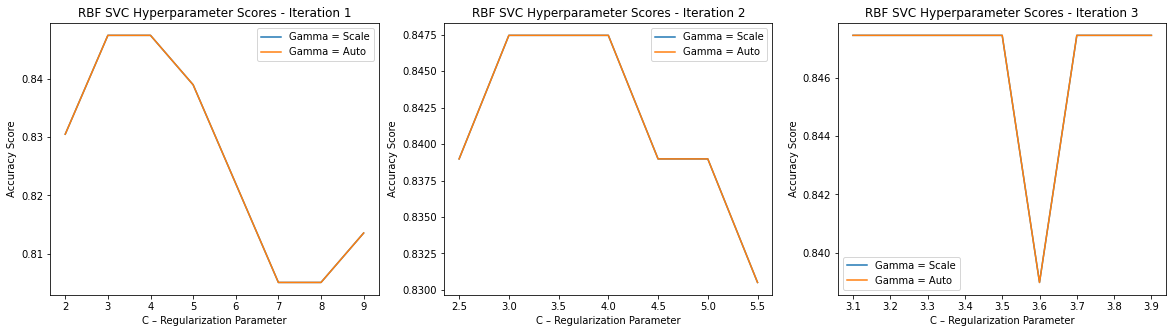

In [56]:
plt.figure(figsize=(20,5))

#Iteration 1 Visualiation
plt.subplot(1,3,1)
plt.plot(iter1_C[::2], iter1_scores[::2], label="Gamma = Scale")
plt.plot(iter1_C[1::2], iter1_scores[1::2], label="Gamma = Auto")
plt.title("RBF SVC Hyperparameter Scores - Iteration 1")
plt.xlabel("C – Regularization Parameter")
plt.ylabel("Accuracy Score")
plt.legend()

#Iteration 2 Visualiation
plt.subplot(1,3,2)
plt.plot(iter2_C[::2], iter2_scores[::2], label="Gamma = Scale")
plt.plot(iter2_C[1::2], iter2_scores[1::2], label="Gamma = Auto")
plt.title("RBF SVC Hyperparameter Scores - Iteration 2")
plt.xlabel("C – Regularization Parameter")
plt.ylabel("Accuracy Score")
plt.legend()

#Iteration 3 Visualiation
plt.subplot(1,3,3)
plt.plot(iter3_C[::2], iter3_scores[::2], label="Gamma = Scale")
plt.plot(iter3_C[1::2], iter3_scores[1::2], label="Gamma = Auto")
plt.title("RBF SVC Hyperparameter Scores - Iteration 3")
plt.xlabel("C – Regularization Parameter")
plt.ylabel("Accuracy Score")
plt.legend()


From the GridSearchCV results visualisation, we can see that the accuracy score is optimal when the regularisation parameter, C, is 3.5; This is similar for values within the 3-4 range, apart from 3.6 whose accuracy dips slightly). Both the Scale and Auto Gamma output the same accuracy scores. Therefore the hyperparameters for this Support Vector are as follows:
1. **kernel:** Radial Basis Function ('rbf')
2. **gamma:** Either 'scale' or 'auto' ('scale')
3. **C:** 3.5 (Optimal regularisation parameter)

### Final Modeling
Now that we have found our hyperparameters, we can train the entire model on the entire training dataset and test accuracy with the testing dataset. (This split was done before the modeling with crossvalidation)

In [62]:
model = SVC(kernel='rbf', C=3.5, gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'The model accuracy score on test data is: {score}')

The model accuracy score on test data is: 0.7769230769230769


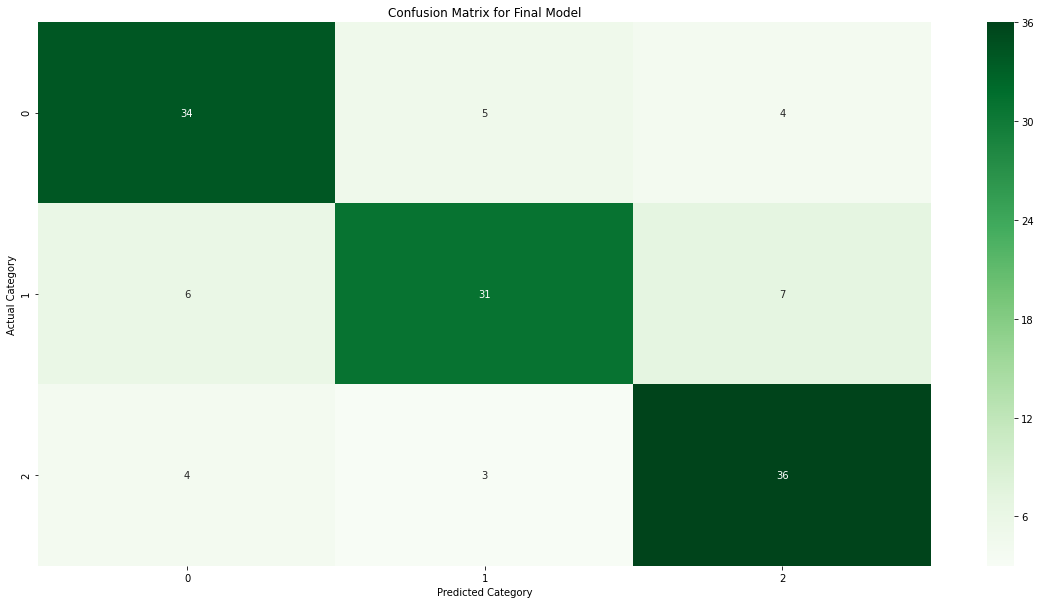

In [64]:
#Output confusion matrix for classification analysis
matrix = confusion_matrix(y_test, y_pred)

#Visualise the matrix
plt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True, cmap='Greens')
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title("Confusion Matrix for Final Model")
plt.show()


**Notes:** Ensemble methods could be tested with the data as the model work well with data that is not linearly separable. Trying out RandomForest and/or AdaBoost may have better results, but this was out of the scope of the current project.

## Model Deployment

In [60]:
## Train model with the entire dataset before shipping
model = SVC(kernel='rbf', C=3.5, gamma='scale')
model.fit(X, y)

# save the model to disk
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))

### Useful Functions (Data Prep and Modeling)

In [ ]:
'''The following function takes in a pandas dataframe with 30 features,
Outputs categorical predictions'''
def get_predictions(data):
    X = data
    if X.shape[1] != 30:
        print("Features are 30 as required by the model")
    elif X.shape[1] == 30:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        filename = 'final_model.sav'
        model = pickle.load(open(filename,'rb'))
        return model.predict(X_scaled)